In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
!pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [10]:
import splitfolders

splitfolders.ratio(
    "PlantVillage",       
    output="dataset",        
    ratio=(.7, .1, .2)     
)

Copying files: 2152 files [00:04, 451.22 files/s]


In [20]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [16]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [18]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.38887146 0.37710676 0.44377342]
  [0.4583047  0.44654    0.51320666]
  [0.3969934  0.38522866 0.45189536]
  ...
  [0.65204823 0.64812666 0.7187149 ]
  [0.65144366 0.6475221  0.7181103 ]
  [0.6513338  0.64741224 0.71800053]]

 [[0.39147797 0.37971327 0.44637993]
  [0.45668656 0.44492185 0.5115885 ]
  [0.39802465 0.38625994 0.4529266 ]
  ...
  [0.68749744 0.68357587 0.7541641 ]
  [0.68900895 0.6850874  0.7556756 ]
  [0.68954754 0.685626   0.7562142 ]]

 [[0.39571014 0.38394544 0.45061213]
  [0.45396584 0.44220114 0.50886786]
  [0.40044305 0.38867834 0.455345  ]
  ...
  [0.61722046 0.6132989  0.6838871 ]
  [0.6141975  0.6102759  0.68086416]
  [0.6119714  0.6080498  0.67863804]]

 ...

 [[0.50670874 0.49494407 0.56945384]
  [0.5072204  0.49545565 0.5699655 ]
  [0.50888306 0.49711832 0.57162815]
  ...
  [0.66775787 0.67167944 0.74226767]
  [0.680194   0.6841156  0.7547038 ]
  [0.6555188  0.65944034 0.73002857]]

 [[0.54866296 0.53689826 0.61140805]
  [0.5473575  0.5355928  0.6101026 ]


In [24]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 215 images belonging to 3 classes.


In [28]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 431 images belonging to 3 classes.


In [30]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
1506/32

47.0625

In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4660 - loss: 0.9483 - val_accuracy: 0.4479 - val_loss: 0.9091
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.3750 - loss: 0.8984

C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3750 - loss: 0.8984 - val_accuracy: 0.4688 - val_loss: 0.8921
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5969 - loss: 0.8188 - val_accuracy: 0.7865 - val_loss: 0.4942
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7188 - loss: 0.6622 - val_accuracy: 0.7500 - val_loss: 0.5490
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8168 - loss: 0.4512 - val_accuracy: 0.8594 - val_loss: 0.3737
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9375 - loss: 0.1738 - val_accuracy: 0.8281 - val_loss: 0.3777
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8865 - loss: 0.3149 - val_accuracy: 0.9062 - val_loss: 0.2530
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9688 - loss: 0.1637 - val_accuracy: 0.8542 - val_loss: 0.3169
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9002 - loss: 0.2736 - val_accuracy: 0.9115 - val_loss: 0.26

In [42]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9325 - loss: 0.1677


In [44]:
scores

[0.17473585903644562, 0.9373549818992615]

Plotting the Accuracy and Loss Curves

In [47]:
history

In [49]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [53]:
type(history.history['loss'])

list

In [55]:
len(history.history['loss'])

20

In [57]:
history.history['loss'][:5]

[0.914149284362793,
 0.8984496593475342,
 0.7288033962249756,
 0.6622298955917358,
 0.42149272561073303]

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [61]:
val_acc

[0.4479166567325592,
 0.46875,
 0.7864583134651184,
 0.75,
 0.859375,
 0.828125,
 0.90625,
 0.8541666865348816,
 0.9114583134651184,
 0.8645833134651184,
 0.9166666865348816,
 0.9010416865348816,
 0.8802083134651184,
 0.8802083134651184,
 0.9375,
 0.9427083134651184,
 0.8958333134651184,
 0.9322916865348816,
 0.9427083134651184,
 0.921875]

In [63]:
acc

[0.49389415979385376,
 0.375,
 0.6499321460723877,
 0.71875,
 0.8283582329750061,
 0.9375,
 0.896879255771637,
 0.96875,
 0.9002713561058044,
 0.96875,
 0.9165536165237427,
 0.90625,
 0.9274083971977234,
 0.9375,
 0.9443690776824951,
 1.0,
 0.9477611780166626,
 0.90625,
 0.9606512784957886,
 1.0]

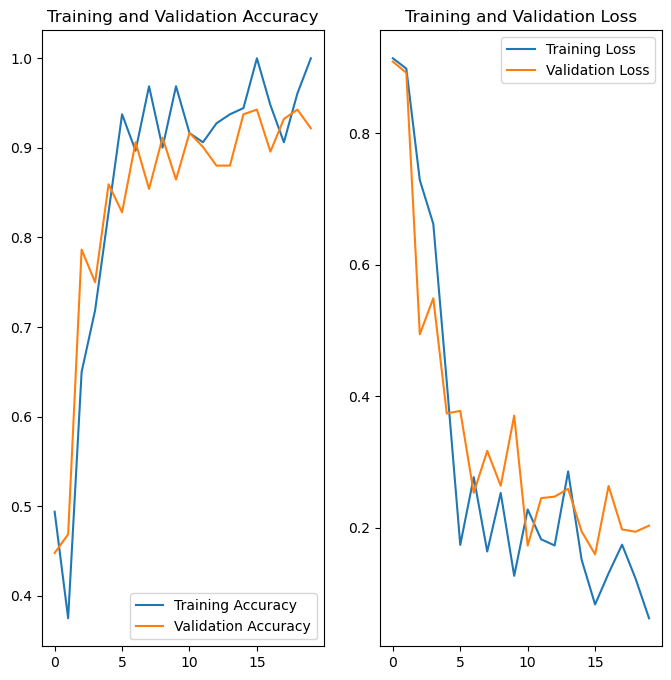

In [65]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

In [72]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [74]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
predicted label: Potato___healthy


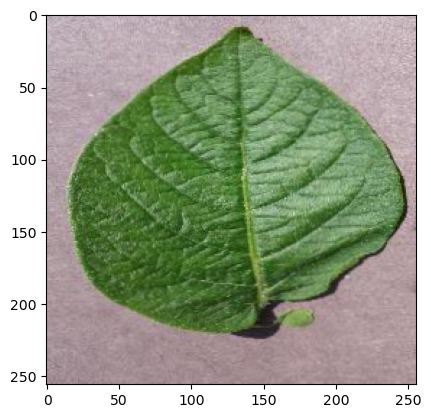

In [78]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

Write a function for inference

In [81]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


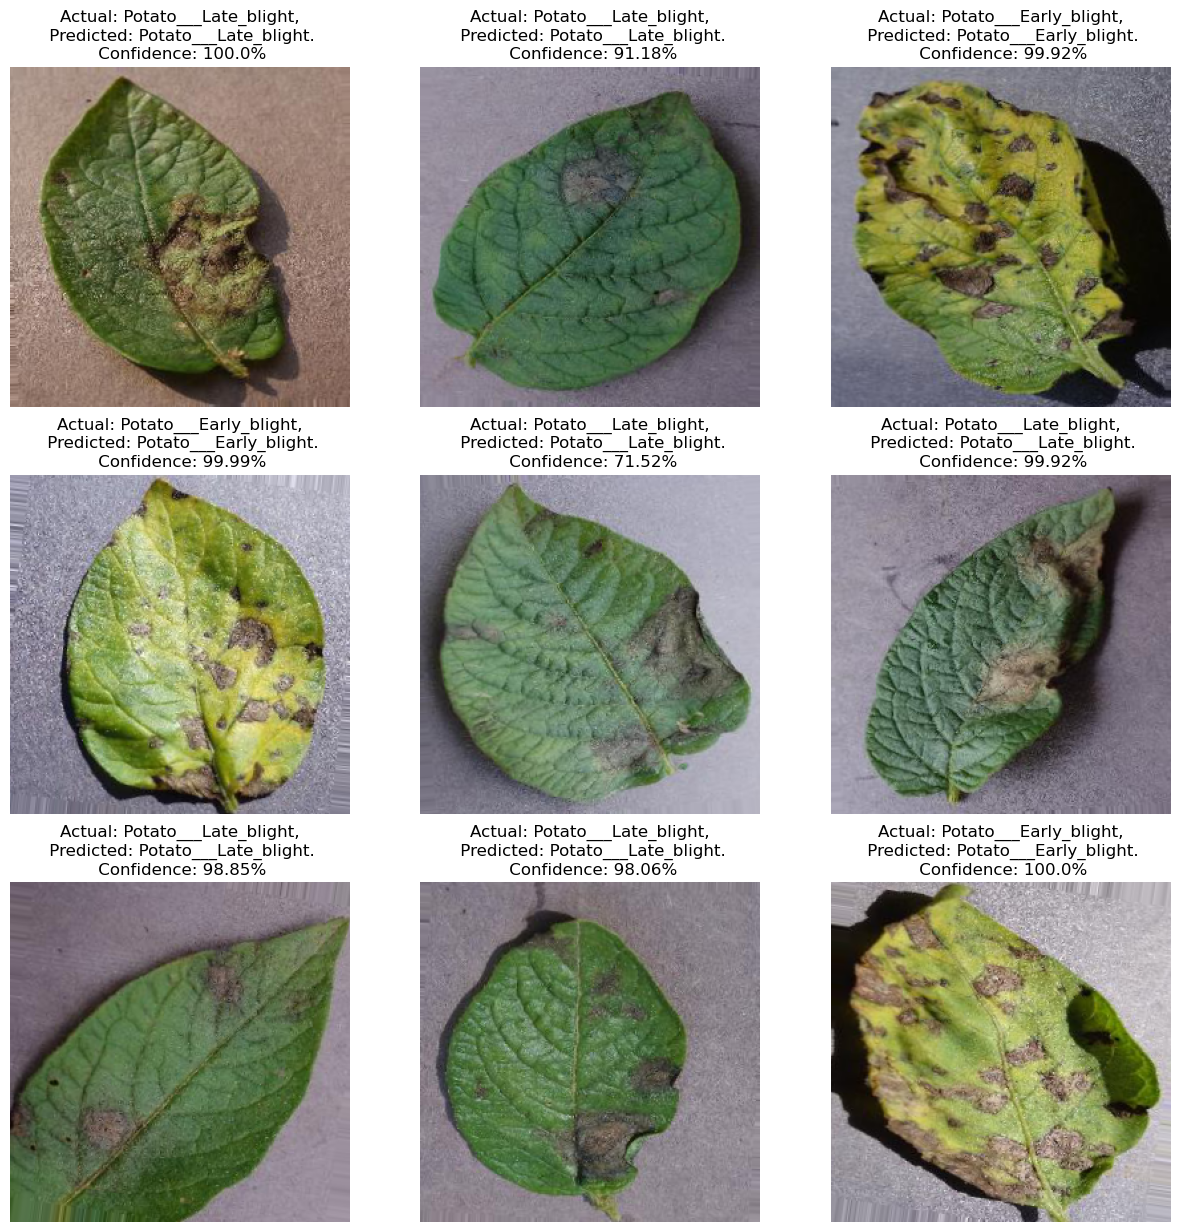

In [84]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [90]:
model.save("../potatoes.h5")